In [1]:
import numpy as np
import pandas as pd
import importlib
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
%matplotlib widget
import os
import sys

from scipy.signal import windows

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import tools
import math_functions as mf

importlib.reload(tools)
importlib.reload(mf)


<module 'math_functions' from 'c:\\Users\\Orlando\\Desktop\\DREAM_repo\\math_functions.py'>

In [2]:
x = np.linspace(0,10, 30*10, endpoint=True)
f = 1.05 # Hz
amplitude = 3
sinusoid = amplitude*np.sin(2*np.pi*f*x)
offset = 2*np.ones(len(x))
#offset = mf.Ek(x, 5, 2.5)
envelope = mf.exp_decay(x, 1, 2.5) + 1
start = mf.exp_decay(x, 5, 1)
#envelope = mf.Ek(x, 1, 2.5)
noise = np.random.normal(0, 0, len(x))
#signal = sinusoid*envelope + offset + start + noise
signal = sinusoid + noise

end_point = -1
f, a, p = tools.FFT(x[:end_point], signal[:end_point])
#f, a_w, p_w = tools.FFT(x[:end_point], signal[:end_point]*windows.flattop(len(signal[:end_point])))

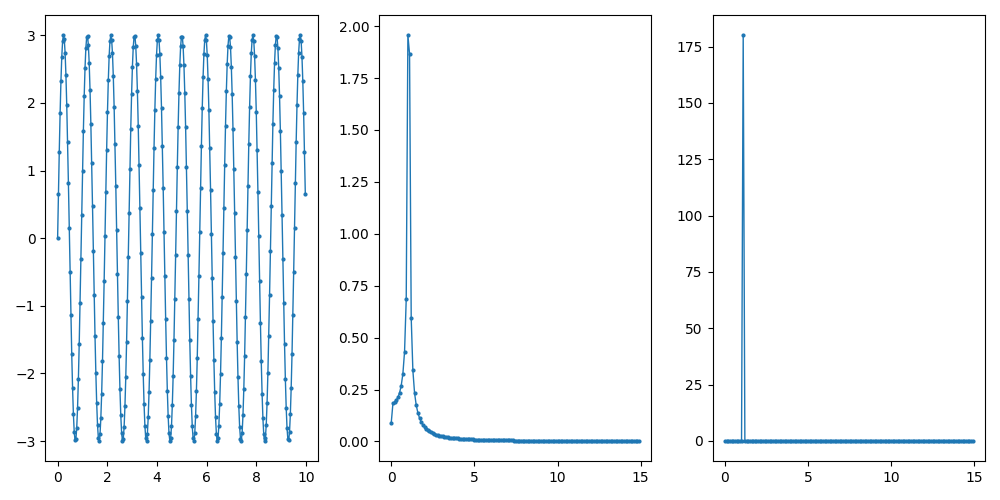

In [3]:
fig, ax = plt.subplots(1,3, figsize = (10,5))
ax[0].plot(x[:end_point], signal[:end_point], "o-", markersize = 2, linewidth = 1)
#ax[0].plot(x, sinusoid, "o-", markersize = 2, linewidth = 1, color = "C1")
#ax[0].plot(x, offset, "o-", markersize = 2, linewidth = 1, color = "C1")
ax[1].plot(f, a, "o-", markersize = 2, linewidth = 1)
#ax[1].plot(f, a_w*4.18, "o-", markersize = 2, linewidth = 1, label = "Flat-top window")
p[a < max(a)/2] = 0
#p_w[a_w < max(a_w)/5] = 0
ax[2].plot(f, p, "o-", markersize = 2, linewidth = 1)
#ax[2].plot(f, p_w, "o-", markersize = 2, linewidth = 1, label = "Flat-top window")
fig.tight_layout()

In [4]:
x = np.linspace(0,10, 30*10, endpoint=True)
f = 1.02 # Hz
amplitude_1 = 3
amplitude_2 = 2
phi_2 = 80*np.pi/180
amplitude_3 = 1
phi_3 = 30*np.pi/180
sinusoid = amplitude_1*np.sin(2*np.pi*f*x) + amplitude_2*np.sin(2*np.pi*(2*f*x + phi_2)) + amplitude_3*np.sin(2*np.pi*(3*f*x + phi_3))
offset = 2*np.ones(len(x))
#offset = mf.Ek(x, 5, 2.5)
envelope = mf.exp_decay(x, 1, 2.5) + 1
start = mf.exp_decay(x, 5, 1)
#envelope = mf.Ek(x, 1, 2.5)
noise = np.random.normal(0, 0, len(x))
#signal = sinusoid*envelope + offset + start + noise
signal = sinusoid + noise

end_point = -1
f, a, p = tools.FFT(x[:end_point], signal[:end_point])
f, a_w, p_w = tools.FFT(x[:end_point], signal[:end_point]*windows.flattop(len(signal[:end_point])))

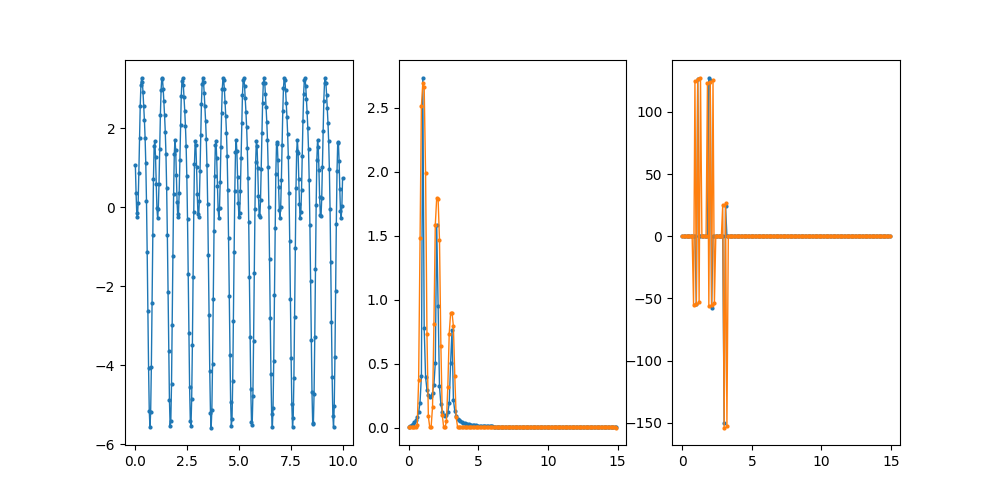

In [5]:
fig, ax = plt.subplots(1,3, figsize = (10,5))
ax[0].plot(x[:end_point], signal[:end_point], "o-", markersize = 2, linewidth = 1)
#ax[0].plot(x, sinusoid, "o-", markersize = 2, linewidth = 1, color = "C1")
#ax[0].plot(x, offset, "o-", markersize = 2, linewidth = 1, color = "C1")
ax[1].plot(f, a, "o-", markersize = 2, linewidth = 1)
ax[1].plot(f, a_w*4.18, "o-", markersize = 2, linewidth = 1, label = "Flat-top window")
p[a < 0.5] = 0
p_w[a_w < max(a_w)/5] = 0
ax[2].plot(f, p, "o-", markersize = 2, linewidth = 1)
ax[2].plot(f, p_w, "o-", markersize = 2, linewidth = 1, label = "Flat-top window")

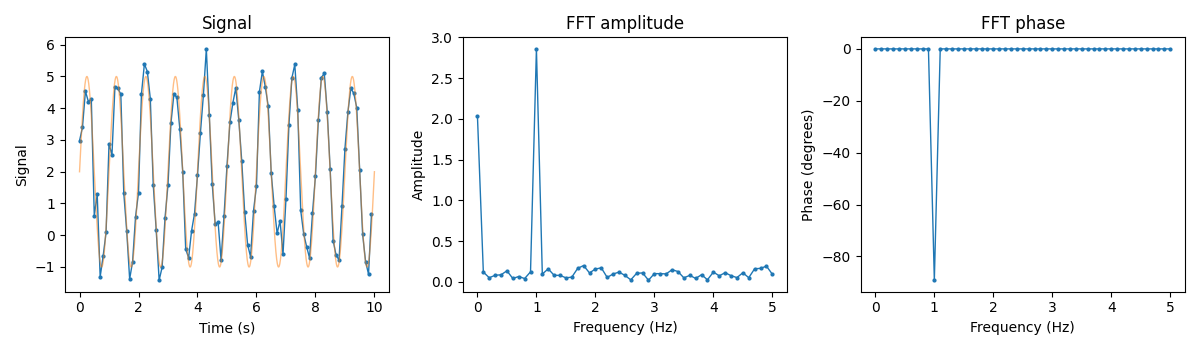

In [6]:
####### PARAMETERS ########
nb_periods = 10
points_per_period = 10
freq = 1 # Hz

amplitude_1 = 3
amplitude_2 = 0
amplitude_3 = 0

phi_2 = 80*np.pi/180
phi_3 = 30*np.pi/180

offset = 2
signal_to_noise = 5

########################

x = np.linspace(0,nb_periods*freq,points_per_period*nb_periods+1, endpoint=True)
x_true = np.linspace(0,nb_periods*freq,1000*nb_periods, endpoint=True)

sinusoid = amplitude_1*np.sin(2*np.pi*freq*x) + amplitude_2*np.sin(2*np.pi*(2*freq*x + phi_2)) + amplitude_3*np.sin(2*np.pi*(3*freq*x + phi_3))
sinusoid_true = amplitude_1*np.sin(2*np.pi*freq*x_true) + amplitude_2*np.sin(2*np.pi*(2*freq*x_true + phi_2)) + amplitude_3*np.sin(2*np.pi*(3*freq*x_true + phi_3))

np.random.seed(1)
noise = np.random.normal(0, amplitude_1/signal_to_noise, len(x))
signal = sinusoid + offset*np.ones(len(x))  + noise

end_point = -1
f, a, p = tools.FFT(x[:end_point], signal[:end_point])
p[a < 0.5] = 0

fig, ax = plt.subplots(1,3, figsize = (12,3.5))
ax[0].plot(x[:end_point], signal[:end_point], "o-", markersize = 2, linewidth = 1)
ax[0].plot(x_true, sinusoid_true + offset*np.ones(len(x_true)), markersize = 2, linewidth = 1, color = "C1", alpha = 0.5)
ax[1].plot(f, a, "o-", markersize = 2, linewidth = 1)
ax[2].plot(f, p, "o-", markersize = 2, linewidth = 1)
ax[0].set_xlabel("Time (s)")
ax[0].set_ylabel("Signal")
ax[1].set_xlabel("Frequency (Hz)")
ax[1].set_ylabel("Amplitude")
ax[2].set_xlabel("Frequency (Hz)")
ax[2].set_ylabel("Phase (degrees)")
ax[0].set_title("Signal")
ax[1].set_title("FFT amplitude")
ax[2].set_title("FFT phase")
fig.tight_layout()

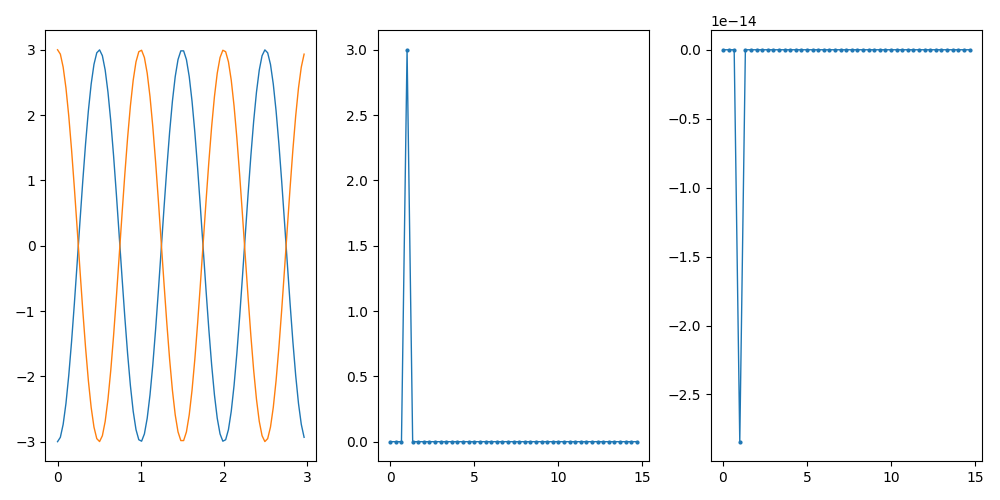

In [7]:
x = np.linspace(0,3, 30*3, endpoint=True)
f = 1 # Hz
amplitude = 3
phase_deg = -90
phase = np.deg2rad(phase_deg)
ref = amplitude*np.cos(2*np.pi*f*x)
sinusoid = amplitude*np.sin(2*np.pi*f*x + phase)
offset = 2*np.ones(len(x))
signal = sinusoid

end_point = -1
f, a, p = tools.FFT(x[:end_point], signal[:end_point])
p = p-180

fig, ax = plt.subplots(1,3, figsize = (10,5))
ax[0].plot(x[:end_point], signal[:end_point], "-", markersize = 2, linewidth = 1)
ax[0].plot(x[:end_point], ref[:end_point], "-", markersize = 2, linewidth = 1, color = "C1")
ax[1].plot(f, a, "o-", markersize = 2, linewidth = 1)
p[a < max(a)/2] = 0
ax[2].plot(f, p, "o-", markersize = 2, linewidth = 1)
fig.tight_layout()


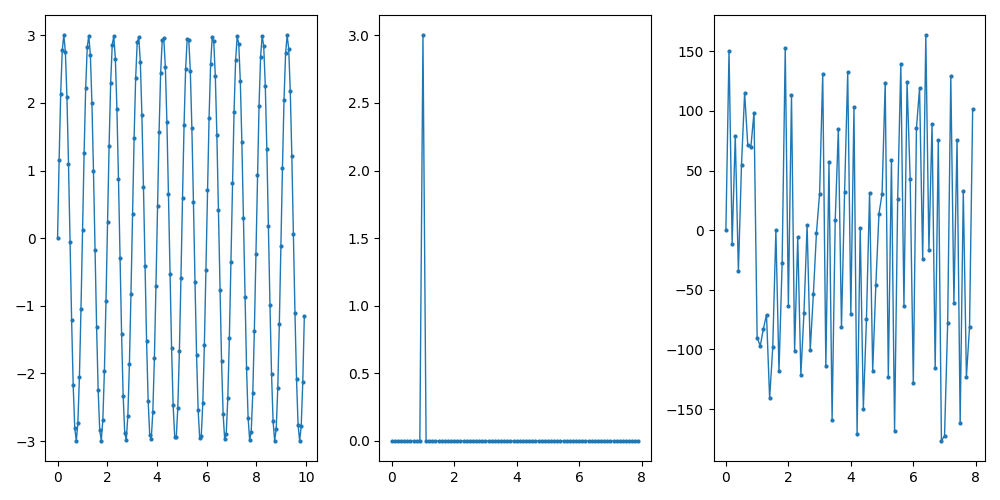

In [8]:
nb_periods = 10
points_per_period = 16

x = np.linspace(0,nb_periods, nb_periods*points_per_period, endpoint=True)
f = 1 # Hz
amplitude = 3
sinusoid = amplitude*np.sin(2*np.pi*f*x)
offset = 2*np.ones(len(x))
noise = np.random.normal(0, 0, len(x))
signal = sinusoid + noise

end_point = -1
f, a, p = tools.FFT(x[:end_point], signal[:end_point])

fig, ax = plt.subplots(1,3, figsize = (10,5))
ax[0].plot(x[:end_point], signal[:end_point], "o-", markersize = 2, linewidth = 1)
ax[1].plot(f, a, "o-", markersize = 2, linewidth = 1)
ax[2].plot(f, p, "o-", markersize = 2, linewidth = 1)
fig.tight_layout()

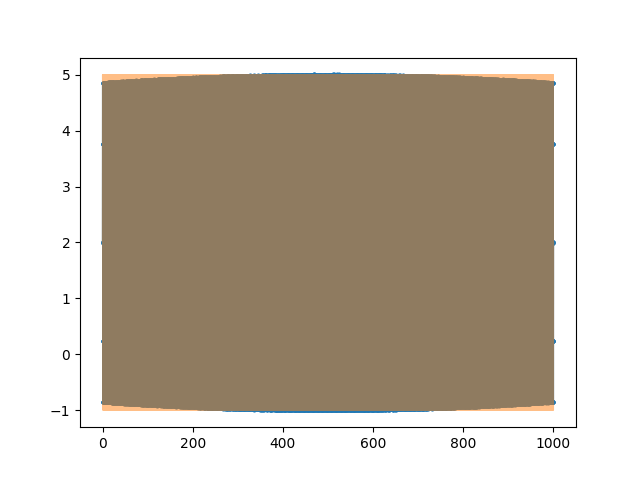

In [31]:
####### PARAMETERS ########
nb_periods = 1000
points_per_period = 10
freq = 1 # Hz

amplitude_1 = 3

offset = 2
signal_to_noise = 1000

########################

x = np.linspace(0,nb_periods*freq,points_per_period*nb_periods, endpoint=True)
x_true = np.linspace(0,nb_periods*freq,1000*nb_periods, endpoint=True)

sinusoid = amplitude_1*np.sin(2*np.pi*freq*x)
sinusoid_true = amplitude_1*np.sin(2*np.pi*freq*x_true)

np.random.seed(1)
noise = np.random.normal(0, amplitude_1/signal_to_noise, len(x))
signal = sinusoid + offset*np.ones(len(x))  + noise

fig, ax = plt.subplots()
ax.plot(x, signal, "o-", markersize = 2, linewidth = 1)
ax.plot(x_true, sinusoid_true + offset*np.ones(len(x_true)), linewidth = 1, color = "C1", alpha = 0.5)

In [15]:
len(x)

1001